<div align='center'>
    <h1>Tugas Besar DKA</h1>
    <h3>Kelompok 4</h3>
</div>

## Import

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation


## Fetching Data

In [145]:
#Fetch Data

## Visualisasi Membership Function

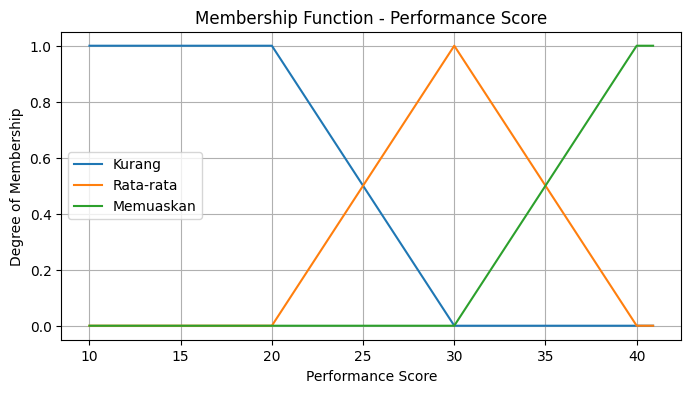

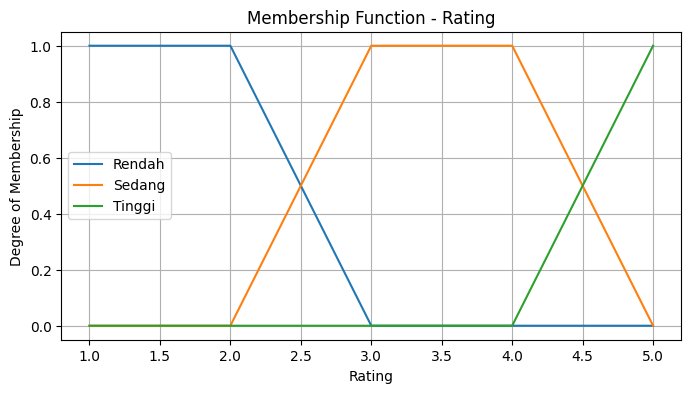

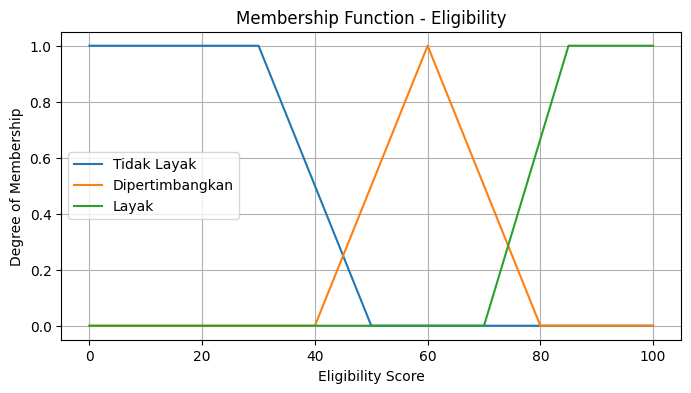

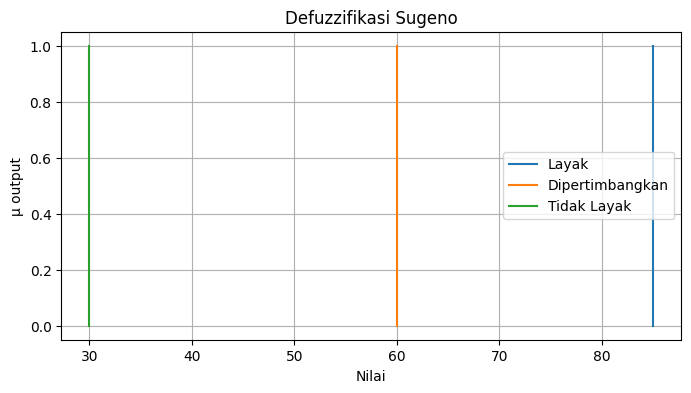

In [146]:
# Universe
performance_x = np.arange(10, 41, 0.1)
rating_x = np.arange(1, 5.1, 0.1)
eligibility_x = np.arange(0, 101, 1)

# Performance Score Membership Functions
kurang = fuzz.trapmf(performance_x, [0, 10, 20, 30])
rata = fuzz.trimf(performance_x, [20, 30, 40])
memuaskan = fuzz.trapmf(performance_x, [30, 40, 50, 50])

# Rating Membership Functions
rendah = fuzz.trapmf(rating_x, [1, 1, 2, 3])
sedang = fuzz.trapmf(rating_x, [2, 3, 4, 5])
tinggi = fuzz.trapmf(rating_x, [4, 5, 5, 6])

# Eligibility Membership Functions
tidak_layak = fuzz.trapmf(eligibility_x, [0, 0, 30, 50])
pertimbangan = fuzz.trimf(eligibility_x, [40, 60, 80])
layak = fuzz.trapmf(eligibility_x, [70, 85, 100, 100])

# Plot Performance Score
plt.figure(figsize=(8, 4))
plt.plot(performance_x, kurang, label='Kurang')
plt.plot(performance_x, rata, label='Rata-rata')
plt.plot(performance_x, memuaskan, label='Memuaskan')
plt.title('Membership Function - Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()

# Plot Rating
plt.figure(figsize=(8, 4))
plt.plot(rating_x, rendah, label='Rendah')
plt.plot(rating_x, sedang, label='Sedang')
plt.plot(rating_x, tinggi, label='Tinggi')
plt.title('Membership Function - Rating')
plt.xlabel('Rating')
plt.ylabel('Degree of Membership')
plt.legend()
plt.grid(True)
plt.show()

# Plot Eligibility
plt.figure(figsize=(8, 4))
plt.plot(eligibility_x, tidak_layak, label='Tidak Layak')
plt.plot(eligibility_x, pertimbangan, label='Dipertimbangkan')
plt.plot(eligibility_x, layak, label='Layak')
plt.title('Membership Function - Eligibility')
plt.xlabel('Eligibility Score')
plt.ylabel('Degree of Membership')
plt.legend()

plt.grid(True)
plt.show()

#Plot Defuzzifikasi Sugeno
Layak = [85,85]
Dipertimbangkan = [60,60]
TidakLayak = [30,30]
y = [0,1]
plt.figure(figsize=(8, 4))
plt.title("Defuzzifikasi Sugeno")
plt.plot(Layak, y, label = 'Layak')
plt.plot(Dipertimbangkan, y, label = 'Dipertimbangkan')
plt.plot(TidakLayak, y, label = 'Tidak Layak')
plt.xlabel('Nilai')
plt.ylabel(r'μ output')
plt.legend()
plt.grid(True)
plt.show()


## Defuzzification Mamdani

In [147]:

# Variabel input
performance = ctrl.Antecedent(np.arange(1, 4.1, 0.1), 'performance')  # 1 (PIP) to 4 (Exceeds)
rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'rating')            # 1 to 5

# Variabel output
eligibility = ctrl.Consequent(np.arange(0, 101, 1), 'eligibility')

# Membership function
performance['kurang'] = fuzz.trapmf(performance.universe, [1, 1, 2, 3])
performance['rata'] = fuzz.trimf(performance.universe, [2, 3, 4])
performance['memuaskan'] = fuzz.trapmf(performance.universe, [3, 4, 5, 5])

rating['rendah'] = fuzz.trapmf(rating.universe, [1, 1, 2, 3])
rating['sedang'] = fuzz.trapmf(rating.universe,  [2, 3, 4, 5])
rating['tinggi'] = fuzz.trapmf(rating.universe, [4, 5, 5, 6])

eligibility['tidak_layak'] = fuzz.trapmf(eligibility.universe, [0, 0, 30, 50])
eligibility['pertimbangan'] = fuzz.trimf(eligibility.universe, [40, 60, 80])
eligibility['layak'] = fuzz.trapmf(eligibility.universe, [70, 85, 100, 100])

# Rules
rules = [
    ctrl.Rule(performance['memuaskan'] & rating['tinggi'], eligibility['layak']),
    ctrl.Rule(performance['memuaskan'] & rating['sedang'], eligibility['layak']),
    ctrl.Rule(performance['memuaskan'] & rating['rendah'], eligibility['pertimbangan']),
    
    ctrl.Rule(performance['rata'] & rating['tinggi'], eligibility['layak']),
    ctrl.Rule(performance['rata'] & rating['sedang'], eligibility['pertimbangan']),
    ctrl.Rule(performance['rata'] & rating['rendah'], eligibility['tidak_layak']),
    
    ctrl.Rule(performance['kurang'] & rating['tinggi'], eligibility['pertimbangan']),
    ctrl.Rule(performance['kurang'] & rating['sedang'], eligibility['tidak_layak']),
    ctrl.Rule(performance['kurang'] & rating['rendah'], eligibility['tidak_layak']),
]

# Sistem kontrol|
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)


def defuzzification_mamdani(performance_input, rating_input):
    if performance_input == "PIP":
        performance_input = 1
    elif performance_input == "Needs Improvement":
         performance_input = 2
    elif performance_input == "Fully Meets":
         performance_input = 3
    elif performance_input == "Exceeds":
         performance_input = 4
        
    # Hasil crisp
    sim.input['performance'] = performance_input
    sim.input['rating'] = rating_input

    # Simulasi
    sim.compute()

    # Ambil output setelah simulasinya dihitung
    nilai_crisp = sim.output['eligibility']
    return nilai_crisp
    

# Defuzzification Sugeno

In [148]:
def defuzzification_sugeno(performance_input, rating_input):
    # Konversi input performance kategori ke nilai numerik
    if performance_input == "PIP":
        performance_input = 1
    elif performance_input == "Needs Improvement":
        performance_input = 2
    elif performance_input == "Fully Meets":
        performance_input = 3
    elif performance_input == "Exceeds":
        performance_input = 4
  

    # Fuzzifikasi Performance Score
    def fuzzy_performance(x):
        return {
            'Kurang': max(min((2 - x) / 1, 1), 0),
            'Rata-Rata': max(min((x - 1) / 1, (3 - x) / 1), 0),
            'Memuaskan': max(min((x - 2) / 1, 1), 0)
        }

    # Fuzzifikasi Rating
    def fuzzy_rating(x):
        return {
            'Rendah': max(min((3 - x) / 1.5, 1), 0),
            'Sedang': max(min((x - 2) / 1, (4 - x) / 1), 0),
            'Tinggi': max(min((x - 3) / 1.5, 1), 0)
        }

    # Aturan Fuzzy Sugeno
    def fuzzy_rules(perf, rate):
        rules = []
        data_rules = [
            ('Memuaskan', 'Tinggi', 'Layak'),
            ('Memuaskan', 'Sedang', 'Layak'),
            ('Memuaskan', 'Rendah', 'Dipertimbangkan'),
            ('Rata-Rata', 'Tinggi', 'Layak'),
            ('Rata-Rata', 'Sedang', 'Dipertimbangkan'),
            ('Rata-Rata', 'Rendah', 'Tidak Layak'),
            ('Kurang', 'Tinggi', 'Dipertimbangkan'),
            ('Kurang', 'Sedang', 'Tidak Layak'),
            ('Kurang', 'Rendah', 'Tidak Layak'),
        ]

        for perf_label, rate_label, output_label in data_rules:
            nilai_perf = perf[perf_label]
            nilai_rate = rate[rate_label]
            kekuatan_aturan = min(nilai_perf, nilai_rate)
            rules.append((kekuatan_aturan, output_label))
        return rules

    # Proses Fuzzifikasi
    perf = fuzzy_performance(performance_input)
    rate = fuzzy_rating(rating_input)

    # Inferensi Fuzzy
    rules = fuzzy_rules(perf, rate)

    # Nilai output tetap untuk metode Sugeno
    output_values = {
        'Layak': 85,
        'Dipertimbangkan': 60,
        'Tidak Layak': 30
    }

    # Defuzzifikasi Sugeno (Weighted Average)
    total_nilai = 0
    total_kekuatan = 0

    for kekuatan, hasil in rules:
        nilai_output = output_values[hasil]
        total_nilai += kekuatan * nilai_output
        total_kekuatan += kekuatan

    if total_kekuatan == 0:
        return 0  

    return total_nilai / total_kekuatan


In [153]:
# Contoh pengujian
data = [
    {'performance': 'Exceeds', 'rating': 4.5},
    {'performance': 'Fully Meets', 'rating': 3},
    {'performance': 'Needs Improvement', 'rating': 2},
    {'performance': 'PIP', 'rating': 4},
]
# Contoh pemanggilan 
for d in data:
    print(f"Performance: {d['performance']}, Rating: {d['rating']}")
    output_mamdani = defuzzification_mamdani(d['performance'], d['rating'])
    output_sugeno =defuzzification_sugeno(d['performance'], d['rating'])
    print(f"Hasil Mamdani {output_mamdani}")
    print("Hasil Sugeno:")
    print(f"Skor Kelayakan: {output_sugeno}")
    print("")



Performance: Exceeds, Rating: 4.5
Hasil Mamdani 86.78571428571409
Hasil Sugeno:
Skor Kelayakan: 85.0

Performance: Fully Meets, Rating: 3
Hasil Mamdani 60.00000000000011
Hasil Sugeno:
Skor Kelayakan: 85.0

Performance: Needs Improvement, Rating: 2
Hasil Mamdani 20.416666666666703
Hasil Sugeno:
Skor Kelayakan: 30.0

Performance: PIP, Rating: 4
Hasil Mamdani 20.416666666666817
Hasil Sugeno:
Skor Kelayakan: 60.0



# Main